In [1]:
import csv

# Open the CSV file
transients = []

with open('cross_matched_transients/all_transformations/obs17.csv', mode='r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    # Iterate through each row in the CSV file
    for row in csv_reader:
        if row[5] == '1':
            transients.append(row)
            #print(row)  # Each row is a list of strings

with open('cross_matched_transients/all_transformations/obs18.csv', mode='r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    # Iterate through each row in the CSV file
    for row in csv_reader:
        if row[5] == '1':
            transients.append(row)
            #print(row)  # Each row is a list of strings

In [2]:
transients[0][14]

'53349'

In [3]:
#check for double counting
transients_no_dup = []
seen = set()
for transient in transients:
    id = transient[14]
    if id not in seen:
        seen.add(id)
        if transient[14] == id:
            transients_no_dup.append(transient)
print(f'Number of transients: {len(transients)}, number of transients without duplicates: {len(transients_no_dup)}')


Number of transients: 33, number of transients without duplicates: 29


In [4]:
transients_w_host = []
transients_wo_host = []
#finding transients with and without host with a threshold of 2.0 arcsec
for transient in transients_no_dup:
    if float(transient[15]) <= 2.0:
        transients_w_host.append(transient)
    if float(transient[15]) > 2.0:
        transients_wo_host.append(transient)
print('Number of transients with host:', len(transients_w_host))
print('Number of transients without host:', len(transients_wo_host))


Number of transients with host: 29
Number of transients without host: 0


In [5]:
#Redshift distribution of transients with host

#Transients with host with redshift
transients_w_host_z = [transient for transient in transients_w_host if transient[-3] != '-99.0' and transient[-3] != '0.0']

print(len(transients_w_host),len(transients_w_host_z))



29 29


In [59]:
[float(transient[-3]) for transient in transients_w_host_z]

[0.6808,
 4.328,
 0.7652,
 1.5164,
 3.3373,
 1.4211,
 0.2339,
 4.6254,
 1.8607,
 1.0222,
 1.2546,
 0.0832,
 0.2168,
 1.6366,
 2.4211,
 1.0,
 0.9,
 1.0085,
 0.6593,
 0.1992,
 2.6106,
 0.722,
 0.9095,
 0.9207,
 0.9977,
 0.7059,
 6.9799,
 0.8877,
 2.0624]

(array([14.,  8.,  3.,  1.,  2.,  0.,  1.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

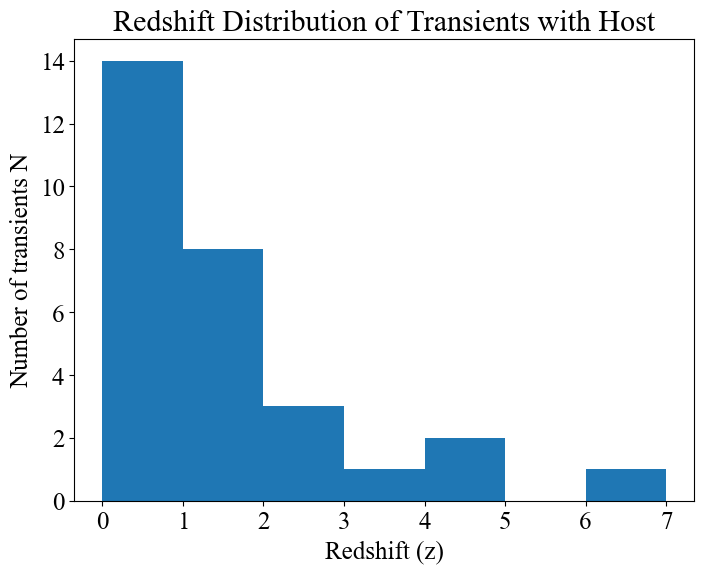

In [60]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    "font.family": "Times New Roman",
    "mathtext.fontset": "stix",
    "font.size": 18
})
plt.title('Redshift Distribution of Transients with Host')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of transients N')
bins = np.arange(0, 8, 1)   # gives [0,1,2,3,4,5,6,7]
plt.hist([float(transient[-3]) for transient in transients_w_host_z], bins=bins)

In [7]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM
def absolute_magnitude(z, m):
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    d_L = cosmo.luminosity_distance(z).to('Mpc').value  # in Megaparsec
    #print(z, d_L)
    # Calculate the absolute magnitude from the apparent magnitude and redshift
    M = m - 5 * np.log10(d_L) - 25
    return M

In [8]:
#Finding the absolute magnitude of the F115W filter of the transients with host
transients_w_host_z_abs = []
for transient in transients_w_host_z:
    transient[7] # F115W magnitude
    transient[-3] # redshift
    F115W_abs_mag = absolute_magnitude(float(transient[-3]), float(transient[7]))
    transients_w_host_z_abs.append(F115W_abs_mag)

In [9]:
z = []
z_error_upper = []
z_error_lower = []


for transient in transients_w_host_z:
    upper = float(transient[-2]) - float(transient[-3])
    lower = float(transient[-3]) - float(transient[-1])
    z.append(float(transient[-3]))
    z_error_lower.append(lower)
    z_error_upper.append(upper)

z = np.array(z)
z_error_upper = np.array(z_error_upper)
z_error_lower = np.array(z_error_lower)
transients_w_host_z_abs = np.array(transients_w_host_z_abs)

In [10]:
len(transients_w_host)

29

In [11]:
print(float(transients_w_host[1][7]),float(transients_w_host[1][12]))
print(float(transients_w_host[1][-2]),float(transients_w_host[1][-3]))

25.9729 -99.0
10.0556 4.328


Text(0, 0.5, '$M_{F115W,abs} $ (Epoch 2) [mag]')

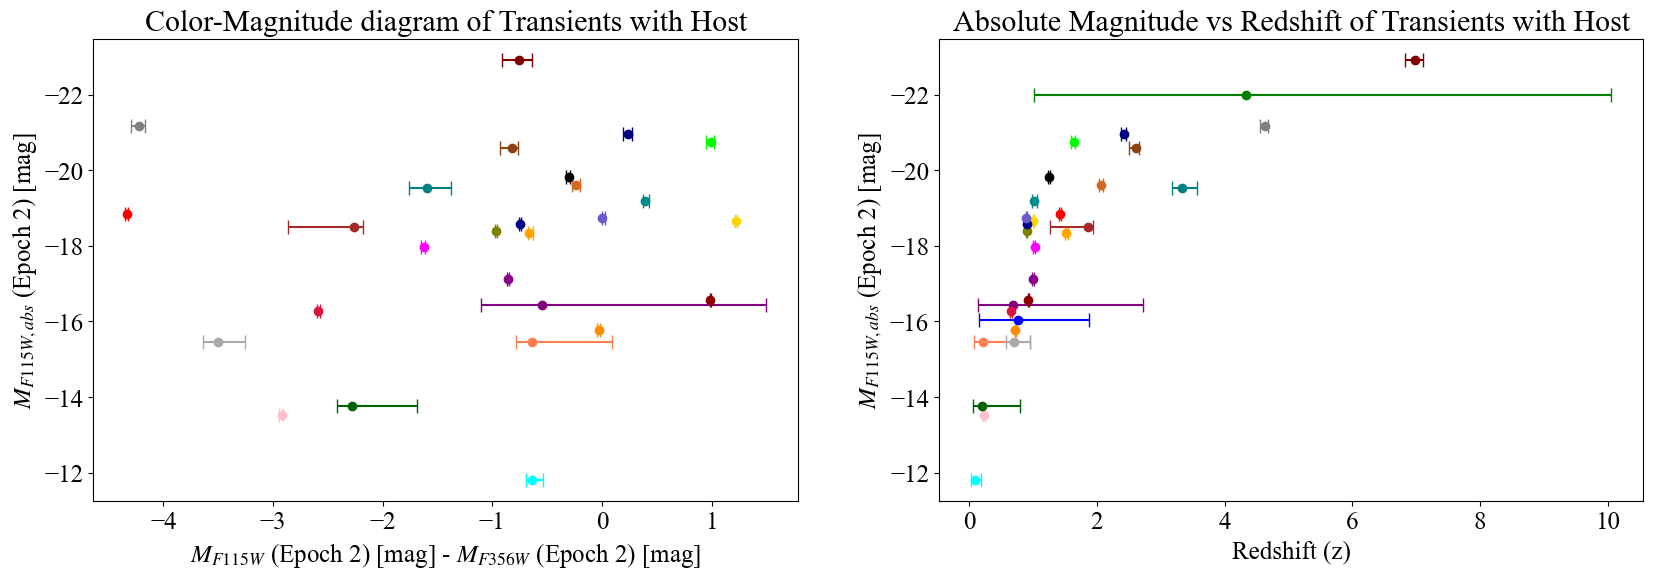

In [12]:

colors = [
    'purple', 'green', 'blue', 'orange', 'teal', 'red', 'pink', 'grey',
    'brown', 'magenta', 'black', 'cyan', 'coral', 'lime', 'navy', 'gold',
    'olive', 'darkcyan', 'crimson', 'darkgreen', 'saddlebrown', 'darkorange',
    'darkblue', 'darkred', 'darkmagenta', 'darkgrey',
    'maroon', 'slateblue', 'chocolate'
]


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()  # Inverts the y-axis
# for i in range(len(transients_w_host)):
#     plt.scatter(float(transients_w_host[i][7])-float(transients_w_host[i][12]),float(transients_w_host[i][7]), color = colors[i])
for i in range(len(transients_w_host_z)):
    if float(transients_w_host[i][7])-float(transients_w_host[i][12]) < 1.5: #only plot those with color less than 1.5 to avoid clutter
        plt.errorbar(float(transients_w_host[i][7])-float(transients_w_host[i][12]), transients_w_host_z_abs[i], xerr=[[z_error_lower[i]], [z_error_upper[i]]], color=colors[i], fmt='o', capsize=5)
plt.xlabel(r'$M_{F115W} $ (Epoch 2) [mag] - $M_{F356W}$ (Epoch 2) [mag]')
plt.ylabel(r'$M_{F115W,abs} $ (Epoch 2) [mag]')
plt.title('Color-Magnitude diagram of Transients with Host')

plt.subplot(1, 2, 2)
plt.title('Absolute Magnitude vs Redshift of Transients with Host')
plt.gca().invert_yaxis()  # Inverts the y-axis
for i in range(len(transients_w_host_z)):
    plt.errorbar(z[i], transients_w_host_z_abs[i], xerr=[[z_error_lower[i]], [z_error_upper[i]]], color=colors[i], fmt='o', capsize=5)
#plt.errorbar(z, transients_w_host_z_abs, xerr=[z_error_lower, z_error_upper], fmt='o', capsize=5)
#plt.xlim(-0.05, 6)
plt.xlabel('Redshift (z)')
plt.ylabel(r'$M_{F115W,abs} $ (Epoch 2) [mag]')

In [13]:
for transient in transients_w_host:
    print(transient[0])

obs17_0
obs17_1
obs17_3
obs17_4
obs17_5
obs17_6
obs17_7
obs17_8
obs17_9
obs17_10
obs17_11
obs17_12
obs18_0
obs18_2
obs18_3
obs18_6
obs18_7
obs18_8
obs18_9
obs18_10
obs18_11
obs18_12
obs18_13
obs18_14
obs18_15
obs18_16
obs18_17
obs18_18
obs18_19


In [14]:
from python_files.Plot_specific_cross_matched_transient import plot, save_plot

obs18_10 RA: 150.11719226711787, DEC: 2.376457546961762 i: 19


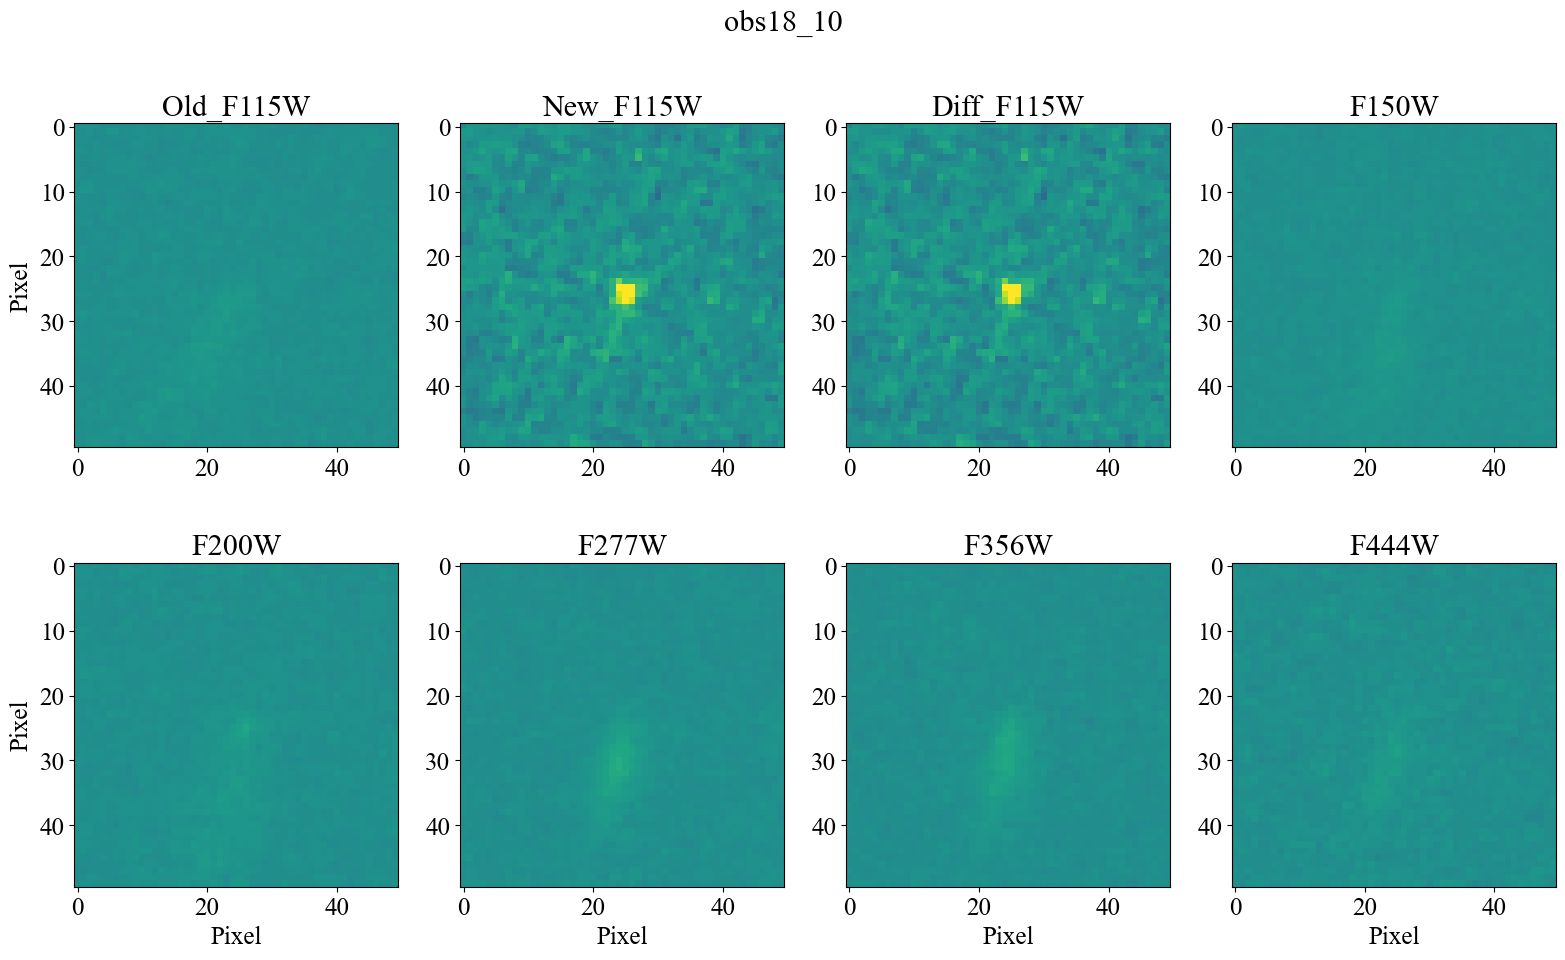

In [65]:
plot('obs18_10')

In [ ]:
import os

output_folder = 'transient_plots_all_trans'

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Delete only .png files in the folder
for filename in os.listdir(output_folder):
    if filename.endswith(".png"):
        file_path = os.path.join(output_folder, filename)
        if os.path.isfile(file_path):
            os.unlink(file_path)

# Save new plots
for transient in transients_w_host:
    save_plot(output_folder, transient[0])


In [49]:
def maxandmin_change_in_magnitude(transients, obs_id='obs17'):
    max_change = 0
    min_change = 999
    transient_id = None
    for transient in transients:
        if transient[0].startswith(obs_id):
            mag1 = float(transient[6])  # F115W_old magnitude
            mag2 = float(transient[7])  # F115W_new magnitude
            change = abs(mag1 - mag2)
            if -70 < mag2 < 99 and -70 < mag1 < 99:  # Ensure magnitudes are valid
                if change > max_change:
                    max_change = change
                    transient_id_max = transient[0]  # Assuming the first column is the ID
                if change < min_change:
                    min_change = change
                    transient_id_min = transient[0]
    return transient_id_max, max_change, transient_id_min, min_change

In [56]:
print(
    maxandmin_change_in_magnitude(transients_w_host, obs_id='obs17'),
    maxandmin_change_in_magnitude(transients_w_host, obs_id='obs18')
)

('obs17_8', 5.139499999999998, 'obs17_4', 1.2991000000000028) ('obs18_10', 2.189, 'obs18_2', 0.028600000000000847)


In [59]:
def luminosity_change(diff):
    return 10 ** (0.4 * diff)

In [61]:
luminosity_change(0.028600000000000847)

1.0266915791859705

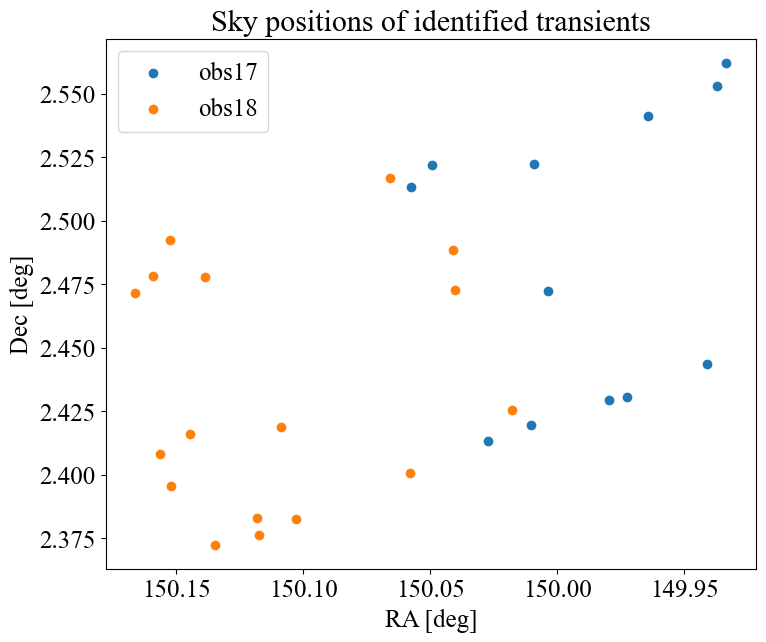

In [67]:

obs17 = []
obs18 = []
for transient in transients_w_host:
    if transient[0].startswith('obs17'):
        obs17.append((float(transient[1]),float(transient[2])))
    if transient[0].startswith('obs18'):
        obs18.append((float(transient[1]),float(transient[2])))

#print(obs18[0])

obs17 = np.array(obs17).T
obs18 = np.array(obs18).T

#print(obs18[0])
plt.figure(figsize=(8,8))
plt.title('Sky positions of identified transients')
plt.scatter(obs17[0],obs17[1], label='obs17')
plt.scatter(obs18[0],obs18[1], label='obs18')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.gca().invert_xaxis()           # conventional for sky plots
plt.gca().set_aspect('equal')      # stop it looking stretched
plt.legend()
plt.tight_layout()
plt.show()
    

In [48]:
import pandas as pd
df_Cos_3D = pd.read_csv('For_YAW/C3D_Candidates_v2_Christa_F115W.csv')
RA = df_Cos_3D['RA']
DEC = df_Cos_3D['Dec']

In [55]:
len(RA)

142

In [70]:
1000*(1.02)**5

1104.0808032

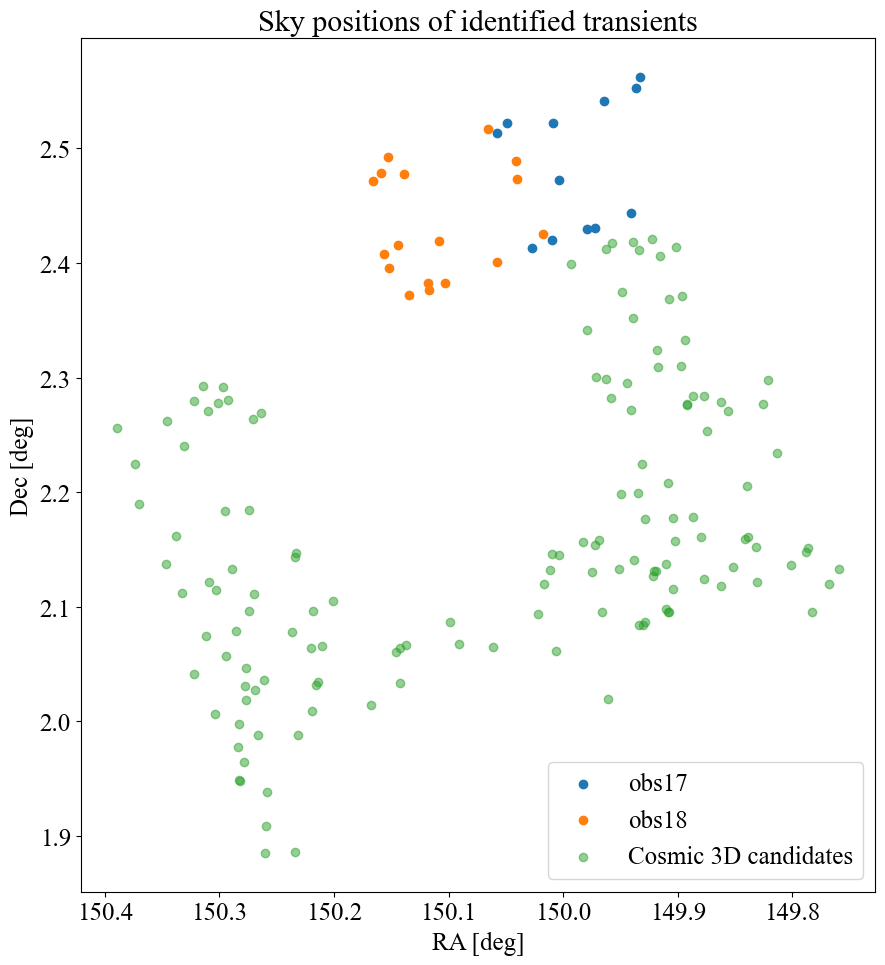

In [66]:
plt.figure(figsize=(10,10))
plt.title('Sky positions of identified transients')
plt.scatter(obs17[0],obs17[1], label='obs17')
plt.scatter(obs18[0],obs18[1], label='obs18')
plt.scatter(RA,DEC, label='Cosmic 3D candidates', alpha=0.5)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.gca().invert_xaxis()           # conventional for sky plots
plt.gca().set_aspect('equal')      # stop it looking stretched
plt.legend()
plt.tight_layout()
plt.show()


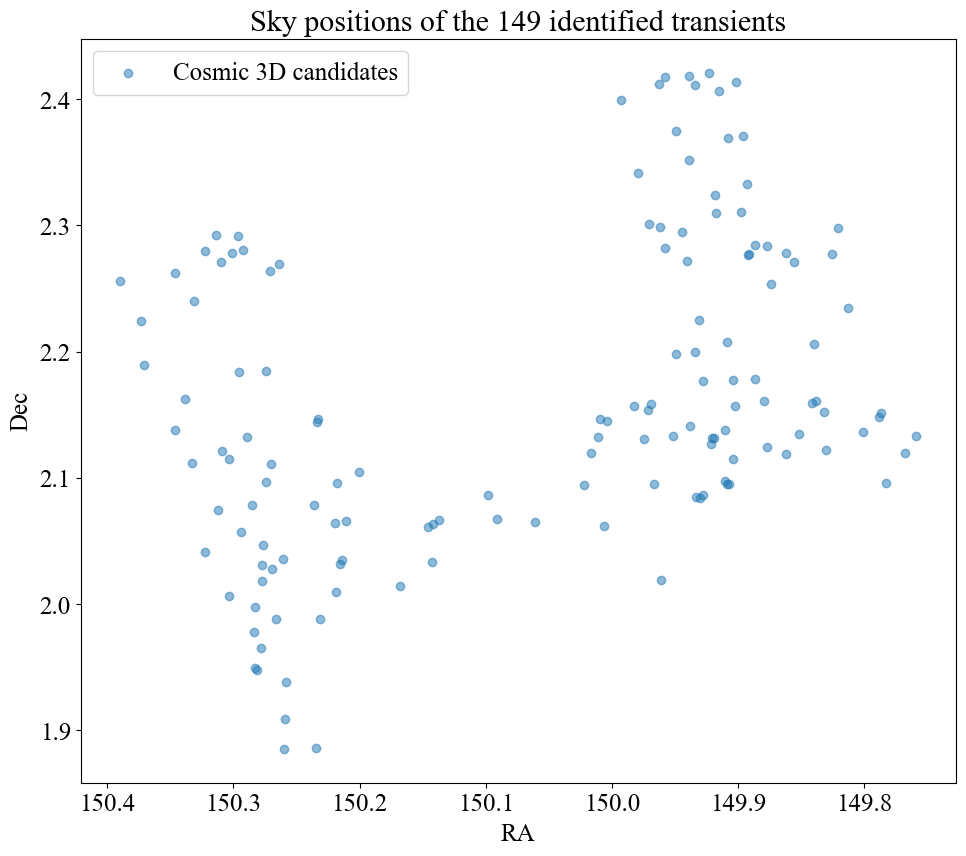

In [54]:
plt.figure(figsize=(10,10))
plt.title('Sky positions of the 149 identified transients')
# plt.scatter(obs17[0],obs17[1], label='obs17')
# plt.scatter(obs18[0],obs18[1], label='obs18')
plt.scatter(RA,DEC, label='Cosmic 3D candidates', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.gca().invert_xaxis()           # conventional for sky plots
plt.gca().set_aspect('equal')      # stop it looking stretched
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
import pandas as pd

# Load the CSV files
obs17 = pd.read_csv('cross_matched_transients/obs17.csv')
obs18 = pd.read_csv('cross_matched_transients/obs18.csv')

def mag_change_stats_old_minus_new(df, name):
    valid = df[(df['F115W_old'] > -90) & (df['F115W_new'] > -90)].copy()
    valid['dm'] = valid['F115W_old'] - valid['F115W_new']
    smallest = valid['dm'].min()
    largest = valid['dm'].max()
    return name, smallest, largest, valid['dm']

def luminisity_change(apparent_diff):
    # Convert magnitude difference to luminosity ratio
    luminosity_ratio = 10 ** (apparent_diff / 2.5)
    return luminosity_ratio

stats_17_oldnew = mag_change_stats_old_minus_new(obs17, 'obs17')
stats_18_oldnew = mag_change_stats_old_minus_new(obs18, 'obs18')

luminosity_min_17 = luminisity_change(stats_17_oldnew[1])
luminosity_min_18 = luminisity_change(stats_18_oldnew[1])

luminosity_max_17 = luminisity_change(stats_17_oldnew[2])
luminosity_max_18 = luminisity_change(stats_18_oldnew[2])

print(stats_17_oldnew[2], stats_18_oldnew[2])
print(luminosity_max_17, luminosity_max_18)

5.139499999999998 2.189
113.71035097106483 7.509309424540645


In [96]:
stats_18_oldnew[3]

0     0.7064
1     2.1495
2     0.5726
3     1.4965
5     1.3768
6     0.2105
8     2.1890
9     0.8867
10    1.4340
11    1.5070
12    1.3808
Name: dm, dtype: float64

In [97]:
luminisity_change(stats_18_oldnew[3])

0     1.916726
1     7.241024
2     1.694494
3     3.968259
5     3.554021
6     1.213948
8     7.509309
9     2.262976
10    3.746278
11    4.006822
12    3.567139
Name: dm, dtype: float64

In [9]:
filepath_to_catalogue = 'C:/Users/andre/MasterCode/CosmosWebCatalogue/COSMOSWeb_master_v3.1.0-sersic-cgs_err-calib_LePhare.fits' #the galaxy catalogue you want to check against
import astropy.io.fits as fits
with fits.open(filepath_to_catalogue) as hdul:

    table = hdul[1].data
    header0 = hdul[0].header 
    header1 = hdul[1].header

rows = []
for i in range(len(table)):
    rows.append(table[i]) 

In [10]:
cosmos_web_catalog = [ (row['ID'], row['RA_DETEC'], row['DEC_DETEC'], row['LP_zPDF']) for row in rows if row['LP_zPDF'] != -99.9]

In [11]:
#check for double counting
cosmos_id_no_dup = []
seen = set()
for row in cosmos_web_catalog:
    id = row[0]
    if id not in seen:
        seen.add(id)
        if row[0] == id:
            cosmos_id_no_dup.append(row)
print(f'Number of objects: {len(cosmos_web_catalog)}, number of objects without duplicates: {len(cosmos_id_no_dup)}')

Number of objects: 783928, number of objects without duplicates: 85639


In [31]:
# Define redshift bins
#z_bins = [(0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0), (3.0, 3.5), (3.5, 4.0), (4.0, 4.5), (4.5, 5.0)]
#z_bins = ['0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
z_bins= ['0.0-1.0', '1.0-2.0' , '2.0-3.0', '3.0-4.0', '4.0-5.0', '5.0-6.0']  # Example bins, adjust as needed
# Initialize dictionaries
cosmos_web = {}
ref_galaxy_id = {}
ref_galaxy_ra = {}
ref_galaxy_dec = {}
ref_galaxy_z = {}


for z in z_bins:
    # Create a key like '05_1' from z_min and z_max
    key = f'{z}'
    z_min = float(z.split('-')[0])   # Convert to decimal
    z_max = float(z.split('-')[1])
    # Filter rows in the redshift bin
    entries = [ (row[0], row[1], row[2], row[3]) for row in cosmos_web_catalog if z_min <= row[3] < z_max ] #cosmos_id_no_dup

    cosmos_web[key] = entries

    if entries:
        sorted_entries = sorted(entries, key=lambda x: x[0])  # sort by ID
    ids, ras, decs, zs = zip(*sorted_entries)
    ref_galaxy_id[key] = list(ids)
    ref_galaxy_ra[key] = list(ras)
    ref_galaxy_dec[key] = list(decs)
    ref_galaxy_z[key] = list(zs)


In [32]:
ref_galaxy_bins = {}
for z in z_bins:
    ref_galaxy_bins[z] = {
        'id': ref_galaxy_id[z],
        'ra': ref_galaxy_ra[z],
        'dec': ref_galaxy_dec[z],
        'z': ref_galaxy_z[z]
    }

In [13]:
import random

sample_size = 1000

# Create fake transients by sampling from cosmos_web
fake_transients = {
    key: random.sample(entries, sample_size)
    for key, entries in cosmos_web.items()
}

# Organize sampled fake transients into separate lists, sorted by ID
fake_transient_id = {}
fake_transient_ra = {}
fake_transient_dec = {}
fake_transient_z = {}

for key, entries in fake_transients.items():
    sorted_entries = sorted(entries, key=lambda x: x[0])  # sort by ID
    ids, ras, decs, zs = zip(*sorted_entries)
    fake_transient_id[key] = list(ids)
    fake_transient_ra[key] = list(ras)
    fake_transient_dec[key] = list(decs)
    fake_transient_z[key] = list(zs)

# # Precompute RA and DEC bounds
# ra_vals = [row[1] for row in cosmos_web_catalog]   #cosmos_id_no_dup
# dec_vals = [row[2] for row in cosmos_web_catalog]  #cosmos_id_no_dup
# ra_min, ra_max = min(ra_vals), max(ra_vals)
# dec_min, dec_max = min(dec_vals), max(dec_vals)

# # Generate fake galaxy positions
# fake_galaxies = np.array([
#     [random.uniform(ra_min, ra_max), random.uniform(dec_min, dec_max)]
#     for _ in range(sample_size)
# ])

In [14]:
ra_deg = np.array([float(ra[1]) for ra in transients_wo_host])
dec_deg = np.array([float(dec[2]) for dec in transients_wo_host])
id = np.array([id[14] for id in transients_wo_host])
sorted_indices = np.argsort(id)
id = id[sorted_indices]

In [15]:
fake_id = np.arange(1,sample_size+1, 1)
sorted_indices = np.argsort(fake_id)
fake_trans_ids = fake_id[sorted_indices]

In [52]:
for key in fake_transient_id:
    print(key)

0.5-1.0
1.0-1.5
1.5-2.0
2.0-2.5
2.5-3.0
3.0-3.5
3.5-4.0
4.0-4.5
4.5-5.0


In [16]:
fake_unknown_catalogs = {}

for key in fake_transient_id:
    fake_unknown_catalogs[key] = {
        "ra": np.array(fake_transient_ra[key]),
        "dec": np.array(fake_transient_dec[key]),
        "id": np.array(fake_transient_id[key])
        # Add "region": transient_regions[key] if applicable
    }


# real_unknown_catalog = {
#     "ra": ra_deg,     # numpy array of RA in degrees
#     "dec": dec_deg,   # numpy array of Dec in degrees
#     "id": id,            # numpy array of unique IDs
#     # Optional if you want to use spatial regions:
#     #"region": transient_regions     # numpy array of region IDs
# }
   

entire_reference_catalog = {
    'ra': np.array([ra for id, ra, dec, z in cosmos_web_catalog]),
    'dec': np.array([dec for id, ra, dec, z in cosmos_web_catalog]),
    'id': np.array([id for id, ra, dec, z in cosmos_web_catalog]),
    'redshift': np.array([z for id, ra, dec, z in cosmos_web_catalog]) 
}
sample_of_entire_catalogue = random.sample(cosmos_web_catalog, sample_size)


sample_of_entire_catalog = {
    'ra': [ra for id, ra, dec, z in sample_of_entire_catalogue] ,
    'dec': [dec for id, ra, dec, z in sample_of_entire_catalogue] ,
    'id': [id for id, ra, dec, z in sample_of_entire_catalogue],
    'redshift': [z for id, ra, dec, z in sample_of_entire_catalogue]   
}
    

In [17]:
entire_reference_catalog['redshift']

array([0.1671, 0.9261, 1.865 , ..., 0.0768, 1.3822, 4.1333],
      shape=(783928,))

In [22]:
#Making a polygon of the COSMOS field to generate random points within it

from shapely.geometry import Point, Polygon
min_ra = min(entire_reference_catalog['ra'])
min_dec = min(entire_reference_catalog['dec'])
max_ra = max(entire_reference_catalog['ra'])
max_dec = max(entire_reference_catalog['dec'])

cosmos_polygon = Polygon([
    (150.325, min_dec), (min_ra, 1.952), (149.92, max_dec), (max_ra, 2.465)  # polygon edges
])

def generate_valid_points(num_points):
    ra_dec_list = []
    while len(ra_dec_list) < num_points:
        # Generate candidates within broad bounds
        ra = np.random.uniform(min_ra, max_ra)
        dec = np.random.uniform(min_dec, max_dec)
        # Check if point is inside the polygon
        if cosmos_polygon.contains(Point(ra, dec)):
            ra_dec_list.append((ra, dec))
    return np.array(ra_dec_list).T  # Returns (ra_array, dec_array)

rand_ra, rand_dec = generate_valid_points(sample_size * 10)

random_catalog = {
    'ra': rand_ra,
    'dec': rand_dec,
    'id': np.arange(1, sample_size * 10 + 1),  # Unique IDs
}

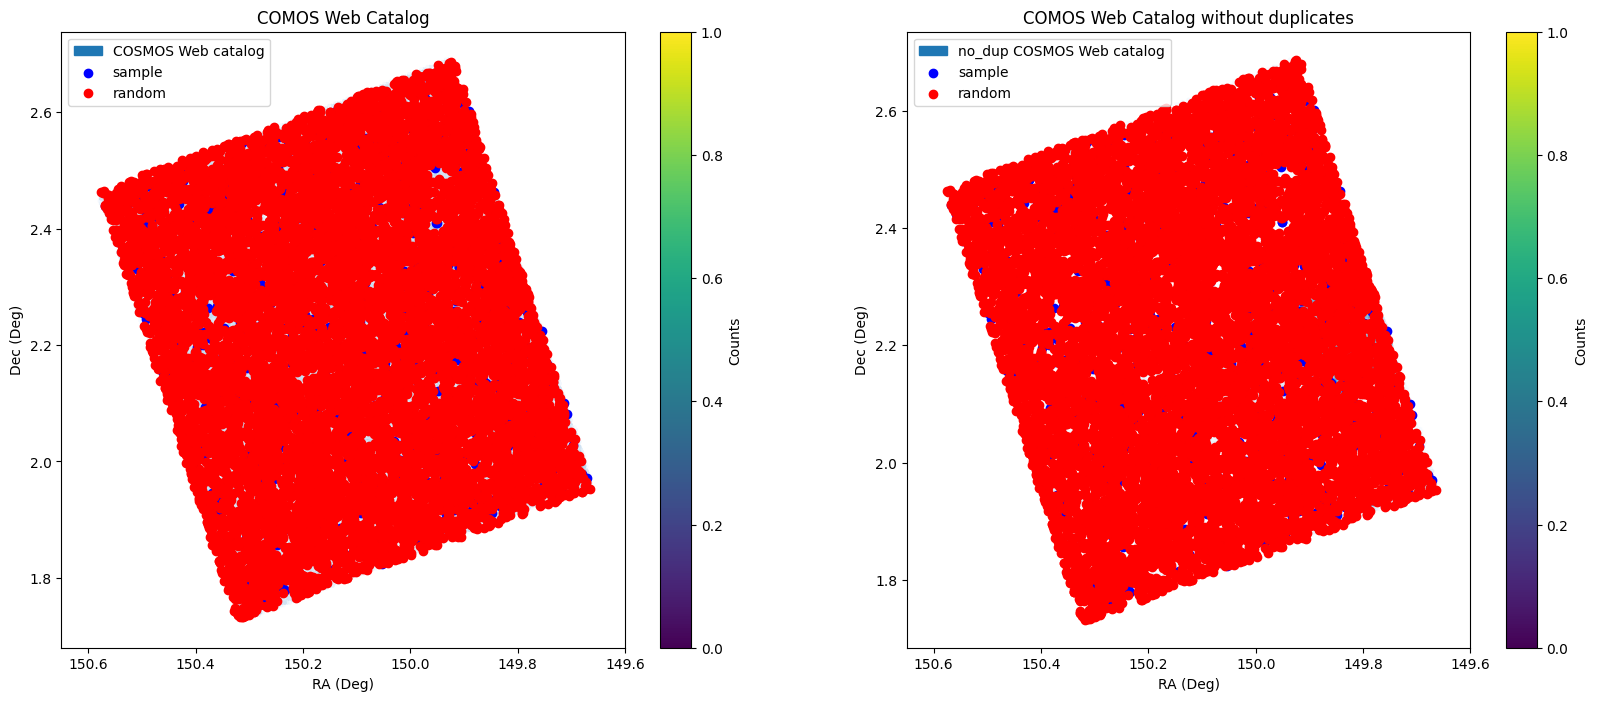

In [20]:
import matplotlib.pyplot as plt
ra_b = [row[1] for row in cosmos_web_catalog]
dec_b = [row[2] for row in cosmos_web_catalog]
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.title('COMOS Web Catalog')
plt.hexbin(ra_b, dec_b, gridsize=200, cmap='Blues', mincnt=1, label ='COSMOS Web catalog')
plt.scatter(sample_of_entire_catalog['ra'],sample_of_entire_catalog['dec'], color='blue', label = 'sample')
plt.scatter(random_catalog['ra'], random_catalog['dec'], color='red', label = 'random')
plt.legend()
plt.xlabel('RA (Deg)')
plt.ylabel('Dec (Deg)')
#plt.ylim(2.21, 2.22)
plt.xlim(150.65, 149.6) 
plt.colorbar(label='Counts')

ra_a = [row[1] for row in cosmos_id_no_dup]
dec_a = [row[2] for row in cosmos_id_no_dup]
plt.subplot(1,2,2)
plt.title('COMOS Web Catalog without duplicates')
plt.hexbin(ra_a, dec_a, gridsize=200, cmap='Blues', mincnt=1, label ='no_dup COSMOS Web catalog')
plt.scatter(sample_of_entire_catalog['ra'],sample_of_entire_catalog['dec'], color='blue', label = 'sample')
plt.scatter(random_catalog['ra'], random_catalog['dec'], color='red', label = 'random')
plt.legend()
plt.xlabel('RA (Deg)')
plt.ylabel('Dec (Deg)')
plt.xlim(150.65, 149.6) 

plt.colorbar(label='Counts')


In [48]:
import pandas as pd

df_entire = pd.DataFrame(entire_reference_catalog)  # Convert dictionary to DataFrame
df_entire.to_csv('For_YAW/entire_reference_catalog.csv', index=False)  # Save DataFrame to CSV

df_05_1 = pd.DataFrame(fake_unknown_catalogs['0.5-1.0'])
df_05_1.to_csv('For_YAW/fake_unknown_catalog_05_1.csv', index=False)

# df_real_transients = pd.DataFrame(real_unknown_catalog)  # Convert dictionary to DataFrame
# df_real_transients.to_csv('For_YAW/real_unknown_catalog.csv', index=False)  # Save DataFrame

df_rand = pd.DataFrame(random_catalog)
df_rand.to_csv('For_YAW/Random_catalog.csv', index=False)

import pickle

# Save
with open("For_YAW/ref_galaxy_bins.pkl", "wb") as f:
    pickle.dump(ref_galaxy_bins, f)